<a href="https://colab.research.google.com/github/samuel-oluwemimo/machine_learning/blob/main/NeuralNetworks__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

## Fashion Mnist Classification

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashionMnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
class_names[y_train[12]]

'Bag'

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7128 - accuracy: 0.7637 - val_loss: 0.5096 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4830 - accuracy: 0.8324 - val_loss: 0.4446 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4378 - accuracy: 0.8479 - val_loss: 0.4163 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4116 - accuracy: 0.8550 - val_loss: 0.4032 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3911 - accuracy: 0.8613 - val_loss: 0.3796 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3760 - accuracy: 0.8681 - val_loss: 0.3670 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3632 - accuracy: 0.8709 - val_loss: 0.3679 - val_accuracy:

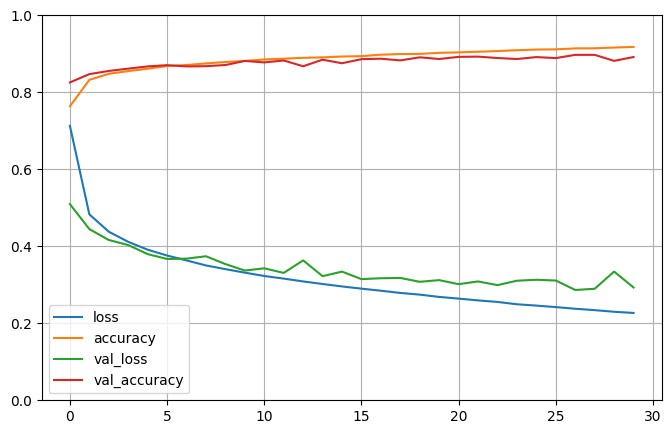

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 56.7997 - accuracy: 0.8546


[56.7996826171875, 0.8546000123023987]

In [12]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 64ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 87ms/step


array([0, 0, 0])

#Regression using sequential api

##California housing

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [49]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [50]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_split=0.2)

Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 2.1158 - val_loss: 0.9266
Epoch 2/20
387/387 [==============================] - 1s 1ms/step - loss: 1.1398 - val_loss: 0.7312
Epoch 3/20
387/387 [==============================] - 0s 1ms/step - loss: 0.7129 - val_loss: 0.6756
Epoch 4/20
387/387 [==============================] - 0s 1ms/step - loss: 0.6673 - val_loss: 0.6388
Epoch 5/20
387/387 [==============================] - 1s 1ms/step - loss: 0.6365 - val_loss: 0.6102
Epoch 6/20
387/387 [==============================] - 1s 1ms/step - loss: 0.6124 - val_loss: 0.5872
Epoch 7/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5926 - val_loss: 0.5688
Epoch 8/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5760 - val_loss: 0.5512
Epoch 9/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5633 - val_loss: 0.5381
Epoch 10/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5517 - val_loss: 0.5276

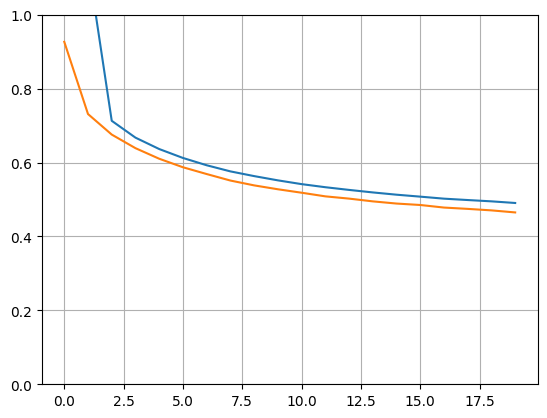

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
mse = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 892us/step - loss: 0.4792


In [53]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 39ms/step


In [54]:
y_pred

array([[162.21399],
       [175.22223],
       [278.86453]], dtype=float32)

#Regression using functional api

In [55]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_split=0.2)
mse_test = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 2.3635 - val_loss: 1.1843
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 0.9954 - val_loss: 0.7084
Epoch 3/20
387/387 [==============================] - 1s 2ms/step - loss: 0.7173 - val_loss: 0.6367
Epoch 4/20
387/387 [==============================] - 0s 1ms/step - loss: 0.6333 - val_loss: 0.5973
Epoch 5/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5963 - val_loss: 0.5658
Epoch 6/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5700 - val_loss: 0.5405
Epoch 7/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5495 - val_loss: 0.5206
Epoch 8/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5335 - val_loss: 0.5041
Epoch 9/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5187 - val_loss: 0.4897
Epoch 10/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5081 - val_loss: 0.4863

In [57]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 14ms/step


array([[161.77441],
       [179.888  ],
       [295.9828 ]], dtype=float32)

In [61]:
inputA = keras.layers.Input(shape=[5])
inputB = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat= keras.layers.concatenate([inputA,hidden1])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[inputA,inputB], outputs=[output,aux_output])

In [63]:
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [65]:
model.compile(loss=['mean_squared_error','mean_squared_error'],
              loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B),(y_train, y_train),epochs=20, validation_split=0.2)

Epoch 1/20
387/387 [==============================] - 2s 3ms/step - loss: 2.7859 - dense_26_loss: 2.3951 - dense_27_loss: 6.3028 - val_loss: 1.4109 - val_dense_26_loss: 1.0098 - val_dense_27_loss: 5.0206
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 1.1547 - dense_26_loss: 0.8444 - dense_27_loss: 3.9482 - val_loss: 0.9690 - val_dense_26_loss: 0.7095 - val_dense_27_loss: 3.3038
Epoch 3/20
387/387 [==============================] - 1s 1ms/step - loss: 0.8986 - dense_26_loss: 0.6950 - dense_27_loss: 2.7317 - val_loss: 0.8224 - val_dense_26_loss: 0.6469 - val_dense_27_loss: 2.4026
Epoch 4/20
387/387 [==============================] - 1s 2ms/step - loss: 0.7957 - dense_26_loss: 0.6506 - dense_27_loss: 2.1023 - val_loss: 0.7466 - val_dense_26_loss: 0.6125 - val_dense_27_loss: 1.9543
Epoch 5/20
387/387 [==============================] - 1s 2ms/step - loss: 0.7380 - dense_26_loss: 0.6213 - dense_27_loss: 1.7887 - val_loss: 0.7032 - val_dense_26_loss: 0.5899 - val_de

In [66]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 84ms/step


In [67]:
y_pred_main

array([[1.4981027],
       [1.4389473],
       [1.1267948]], dtype=float32)

In [68]:
y_pred_aux

array([[2.3800879],
       [2.297667 ],
       [2.283299 ]], dtype=float32)